# Languages Popularity by Year
# Question N°1
This notebook purpose is to answer the First Question: </br>
<b><i>"What languages were the most popular in each year?"</i></b>


In order to do so, I would need previously loaded data about surveys.

In [3]:
%store -r df_surveys_11_to_21

#### Features understanding
I will use the following features to produce an answer
to the question number 1 :

2011. "Which languages are you proficient in?"(column 30) to "Unnamed: 40" (column 40)
2012. "Which languages are you proficient in?" (column 22) to "Unnamed: 34" (column 34)
2013. "Which of the following languages or technologies have you used significantly in the past year?" (column 56)
to "Unnamed: 68" (column 68)
2014. "Which of the following languages or technologies have you used significantly in the past year?" (column 42)
to "Unnamed: 52" (column 52)
2015. "Current Lang & Tech <LanguageName>" columns, (columns from 8 to 49), <LanguageName> would, most of the time,
indicate a name of a programming language, sometimes including also more general technology names (e.g. Android).
2016. "tech_do", "tech_want"
2017. "HaveWorkedLanguage", "WantWorkLanguage"
2018. "LanguageWorkedWith", "LanguageDesireNextYear"
2019. "LanguageWorkedWith", "LanguageDesireNextYear"
2020. "LanguageWorkedWith", "LanguageDesireNextYear"
2021. "LanguageWorkedWith", "LanguageWantToWorkWith"

Before this kind of analysis, it would be better to prepare the data.
In order to do so, I will define Columns' Range of Interest in the first 5 dataframe, 2011 to 2015,
where language proficiencies' features are already split into columns.

In [4]:
# Language Proficiencies Columns' Range of Interest
lang_prof_CROI_2011 = range(30, 41)
lang_prof_CROI_2012 = range(22, 35)
lang_prof_CROI_2013 = range(56, 69)
lang_prof_CROI_2014 = range(42, 53)
lang_prof_CROI_2015 = range(8, 50)

## 3. Data Preparation

First, I already observed that:
1. 2011 to 2014 data has a first non valid data row, containing "Response" as value,
2. 2015 dataframe heading should be properly fixed:

In [5]:
from preparation.data_transform import drop_first_row
# dropping first row in dataframes containing data from 2011 to 2014
drop_first_row(df_surveys_11_to_21, 2011, 2014)


As said, 2015 data hasn't been correctly loaded, since the header doesn't contain valid feature names.
Valid header data is actually in the first dataframe row.
So, I will replace it properly:

In [6]:
new_2015_header = df_surveys_11_to_21[2015].iloc[0]
df_surveys_11_to_21[2015] = df_surveys_11_to_21[2015][1:]
df_surveys_11_to_21[2015].columns = new_2015_header

now I will cross-check the results:

In [7]:
df_surveys_11_to_21[2015].head(1)


,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN


Now I'll prepare data to be categorized, so that it could be better suited for analysis about first question <br/>
(the categorization could be used for other questions too):


In [8]:
new_column_name_prefix = "Proficient in"

Importing proper preparatory functions:

In [9]:
from preparation.data_transform import transform_unnamed_cols_base, feature_split

Preparing 2011 data:

In [10]:
starting_column_name = "Which languages are you proficient in?"
df_surveys_11 = transform_unnamed_cols_base(df_surveys_11_to_21[2011], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2011),
                                            new_column_name_prefix=new_column_name_prefix)
df_surveys_11.head(3)

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,...,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,...,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


the same procedure can be applied to 2012 survey data:

In [11]:

df_surveys_12 = transform_unnamed_cols_base(df_surveys_11_to_21[2012], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2012),
                                            new_column_name_prefix=new_column_name_prefix)
df_surveys_12.head(3)

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 8,Unnamed: 9,...,Please rate the advertising you've seen on Stack Overflow,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,Which of our sites do you frequent most?,Unnamed: 74
1,India,NaN,20-24,<2,Consulting,"Fortune 1000 (1,000+)",Server Programmer,Influencer,Recommender,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,NaN,25-29,<2,Other,Mature Small Business (25-100),Embedded Application Developer,NaN,Recommender,NaN,...,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Disagree,NaN,Don't have an account,Stack Overflow,NaN
3,United Kingdom,NaN,20-24,41070,Finance / Banking,Mature Small Business (25-100),Web Application Developer,Influencer,Recommender,NaN,...,Neutral,Neutral,Neutral,Neutral,Neutral,Strongly Agree,NaN,1,Stack Overflow,NaN


...to 2013 survey data:


In [12]:
starting_column_name = "Which of the following languages or technologies have you used significantly in the past year?"
df_surveys_13 = transform_unnamed_cols_base(df_surveys_11_to_21[2013], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2013),
                                            new_column_name_prefix=new_column_name_prefix)
df_surveys_13.head(3)


,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,How many people work for your company?,Which of the following best describes your occupation?,"Including yourself, how many developers are employed at your company?",How large is the team that you work on?,What other departments / roles do you interact with regularly?,...,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 125,Unnamed: 126,Unnamed: 127
1,United Kingdom,NaN,35-39,6/10/2013,Finance / Banking,101-999,Enterprise Level Services,100,4/8/2013,System Administrators,...,Neutral,Neutral,Neutral,Neutral,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN
2,United States of America,Oregon,25-29,6/10/2013,Retail,101-999,Back-End Web Developer,6/15/2013,4/8/2013,System Administrators,...,Neutral,Agree,Disagree,Neutral,"StackOverflow themselves, Careers 2.0 (SO also...",1,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,NaN
3,United States of America,Wisconsin,51-60,11,Software Products,26-100,Enterprise Level Services,6/15/2013,Just me!,System Administrators,...,Neutral,Strongly Disagree,Strongly Disagree,Strongly Disagree,don't recall seeing ads on Stack Overflow,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN


...to 2014 survey data:


In [13]:
#starting_column_name = "Which of the following languages or technologies have you used significantly in the past year?"
df_surveys_14 = transform_unnamed_cols_base(df_surveys_11_to_21[2014], starting_column_name,
                                            columns_look_ahead=len(lang_prof_CROI_2014),
                                            new_column_name_prefix=new_column_name_prefix)
df_surveys_14.head(3)

,What Country do you live in?,Unnamed: 1,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,How many developers are employed at your company?,...,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
1,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance / Banking,100,...,No,NaN,500,Read other people's questions to solve my prob...,Ask questions to solve problems,NaN,NaN,NaN,NaN,Almost Always
2,Thailand,NaN,NaN,20-24,Male,<2,Back-End Web Developer,Student / Unemployed,Healthcare,NaN,...,NaN,NaN,Don't have an account,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,NaN
3,Iran,NaN,NaN,25-29,Male,6/10/2014,Desktop Software Developer,"<$20,000",Not Currently Employed,1/5/2014,...,No,Tehcodez,1,Read other people's questions to solve my prob...,NaN,NaN,NaN,NaN,NaN,Almost Always


Now, knowing from exploration phase that 2015 dataset have a different features' layout,
I'll use a specific function to prepare the data:

In [14]:
from preparation.data_transform import df_2015_survey_preprocessing
df_surveys_15 = df_2015_survey_preprocessing(df_surveys_11_to_21[2015], lang_prof_CROI_2015)
df_surveys_15.head(3)

,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,...,Why use Stack Overflow: I don't use Stack Overflow,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,0,0,...,NaN,Usually,NaN,NaN,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
2,France,20-24,Male,Spaces,1 - 2 years,Back-end web developer,Windows 7,NaN,0,0,...,NaN,Usually,NaN,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
3,India,20-24,Male,Tabs,1 - 2 years,Back-end web developer,Windows 7,NaN,0,0,...,NaN,Rarely,NaN,NaN,NaN,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN


Data from 2016 survey (and successive) on have a different layout, hence it should be processed differently:
from the fact that in the input dataframes all the feature categories sits in a single column separated by semicolons,
this feature column must be split, in order to obtain a similar layout as in previously described dataframes:

In [15]:
df_surveys_16 = feature_split(df=df_surveys_11_to_21[2016], column_to_split="tech_do", inplace=False)
df_surveys_16.head(3)

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,...,tech_do: Salesforce,tech_do: Scala,tech_do: SharePoint,tech_do: Spark,tech_do: SQL,tech_do: SQL Server,tech_do: Swift,tech_do: Visual Basic,tech_do: Windows Phone,tech_do: WordPress
0,1888,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4637,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11164,Facebook,Afghanistan,Southern Asia,Central Asia,0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


This process will also be applicable to 2017 data:

In [16]:
df_surveys_17 = feature_split(df=df_surveys_11_to_21[2017], column_to_split="HaveWorkedLanguage", inplace=False)
df_surveys_17.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,HaveWorkedLanguage: Lua,HaveWorkedLanguage: VBA,HaveWorkedLanguage: Groovy,HaveWorkedLanguage: Go,HaveWorkedLanguage: Smalltalk,HaveWorkedLanguage: Visual Basic 6,HaveWorkedLanguage: Common Lisp,HaveWorkedLanguage: Dart,HaveWorkedLanguage: Julia,HaveWorkedLanguage: Hack
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2018 data:

In [17]:
df_surveys_18 = feature_split(df=df_surveys_11_to_21[2018], column_to_split="LanguageWorkedWith", inplace=False)
df_surveys_18.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,LanguageWorkedWith: Rust,LanguageWorkedWith: Julia,LanguageWorkedWith: VBA,LanguageWorkedWith: Perl,LanguageWorkedWith: Cobol,LanguageWorkedWith: Visual Basic 6,LanguageWorkedWith: Delphi/Object Pascal,LanguageWorkedWith: Hack,LanguageWorkedWith: Clojure,LanguageWorkedWith: Ocaml
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelorâs degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2019 data:

In [18]:
df_surveys_19 = feature_split(df=df_surveys_11_to_21[2019], column_to_split="LanguageWorkedWith", inplace=False)
df_surveys_19.head(3)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,LanguageWorkedWith: Assembly,LanguageWorkedWith: Kotlin,LanguageWorkedWith: Swift,LanguageWorkedWith: Objective-C,LanguageWorkedWith: Elixir,LanguageWorkedWith: Erlang,LanguageWorkedWith: Clojure,LanguageWorkedWith: F#,LanguageWorkedWith: Scala,LanguageWorkedWith: Dart
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelorâs degree (BA, BS, B.Eng., etc.)",Web development or web design,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


... 2020 data:

In [19]:
df_surveys_20 = feature_split(df=df_surveys_11_to_21[2020], column_to_split="LanguageWorkedWith", inplace=False)
df_surveys_20.head(3)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,LanguageWorkedWith: VBA,LanguageWorkedWith: Perl,LanguageWorkedWith: Scala,LanguageWorkedWith: C++,LanguageWorkedWith: Go,LanguageWorkedWith: Haskell,LanguageWorkedWith: Rust,LanguageWorkedWith: Dart,LanguageWorkedWith: Julia,LanguageWorkedWith: Assembly
0,1,I am a developer by profession,Yes,0.0,13,Monthly,0.0,0.0,Germany,European Euro,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,I am a developer by profession,No,0.0,19,0,0.0,0.0,United Kingdom,Pound sterling,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,I code primarily as a hobby,Yes,0.0,15,0,0.0,0.0,Russian Federation,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


...And 2021 data:

In [20]:
df_surveys_21 = feature_split(df=df_surveys_11_to_21[2021], column_to_split="LanguageHaveWorkedWith", inplace=False)
df_surveys_21.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,LanguageHaveWorkedWith: VBA,LanguageHaveWorkedWith: Groovy,LanguageHaveWorkedWith: Clojure,LanguageHaveWorkedWith: APL,LanguageHaveWorkedWith: LISP,LanguageHaveWorkedWith: F#,LanguageHaveWorkedWith: Elixir,LanguageHaveWorkedWith: Erlang,LanguageHaveWorkedWith: Crystal,LanguageHaveWorkedWith: COBOL
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,0,0,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,0,0,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,0,0,"Bachelorâs degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,I am a developer by profession,Employed full-time,Austria,0,0,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,0,England,"Masterâs degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, results from modeling phase will be analyzed.

## 5. Results Analysis
In this section, I will analyze modelling phase results, computing language usage percentages for each reference year.

Before that, I will set a few global plotting parameters.

In [22]:
# setting variables and stuff about plotting
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [23]:
#print("Before, figure default size is: ", plt.rcParams["figure.figsize"])
plt.rcParams["figure.figsize"] = (20, 10)
#print("After, figure default size is: ", plt.rcParams["figure.figsize"])

In [24]:
# changing plot font, for readability
font = {'weight': 'bold',
        'size': 22}
plt.rc('font', **font)

#### 2011 Results Analysis

In [49]:
proficiency_columns_range_2011 = range(30, 41)
df_2011_proficiencies = df_surveys_11.iloc[:, proficiency_columns_range_2011]
s_2011_proficiencies = df_2011_proficiencies.sum(axis=0)
s_2011_proficiencies.sort_values(ascending=False).head(10)
s_2011_proficiencies.sort_values(ascending=False, inplace=True)

In [50]:
s_2011_proficiencies_top_10 = s_2011_proficiencies.head(10)

In [51]:
s_2011_proficiencies_top_10

Proficient in SQL           1613
Proficient in JavaScript    1419
Proficient in CSS           1356
Proficient in C#            1352
Proficient in Java           861
Proficient in PHP            788
Proficient in C              741
Proficient in C++            740
Proficient in Python         575
Proficient in Ruby           285
dtype: int64

Clearly, most used language in 2011 was SQL, followed by JavaScript and CSS.
Anyway, to be fair, SQL and CSS are not exactly programming languages, so it would be more correct
to indicate JavaScript as the most popular language in 2011, followed by C#.


In [52]:
# dropping SQL and CSS from results
df_2011_proficiencies_clean = df_2011_proficiencies.drop("Proficient in SQL", axis=1)
df_2011_proficiencies_clean = df_2011_proficiencies_clean.drop("Proficient in CSS", axis=1)

In [53]:
# computing total proficiencies once again
df_2011_proficiencies_clean_sum = df_2011_proficiencies_clean.sum(axis=0)

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [54]:
# computing percentages
s_2011_proficiencies_percentages = (df_2011_proficiencies_clean_sum/df_2011_proficiencies_clean.shape[0])*100
s_2011_proficiencies_percentages.index = s_2011_proficiencies_percentages.index.str.replace("Proficient in ", "")

In [55]:
# palette = {"C":"tab:red",
#            "C++":"tab:orange",
#            "Python":"tab:green",
#            "PHP":"tab:purple",
#            "Ruby":"tab:pink",
#            }

Before proceeding with the plot, I need to fix some matplotlib global variables, to make the plot look more readeable:


Top 5 languages by proficiency in 2011:

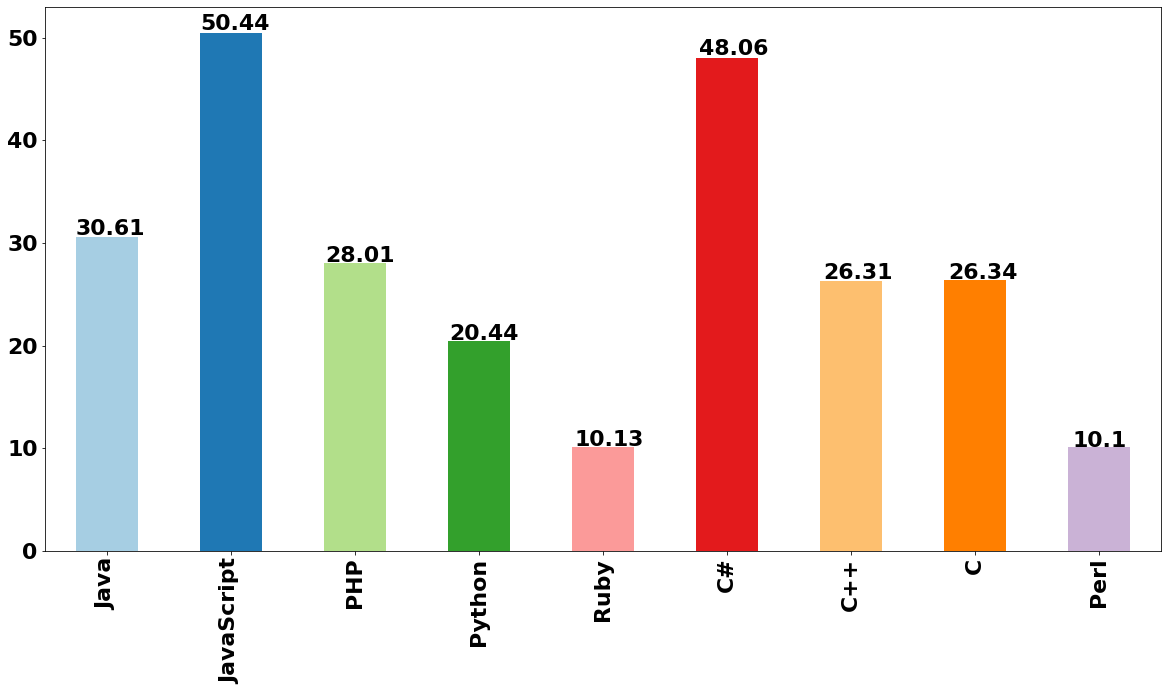

In [56]:
# sorting data to keep palette colors through plots
# s_2011_proficiencies_percentages.sort_index(inplace=True)

# plotting data
ax = s_2011_proficiencies_percentages.plot.bar(color=plt.cm.Paired(np.arange(len(s_2011_proficiencies_percentages))))

# annotating values on top of each bar, for readability
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

In [34]:
# sns.histplot(data=s_2011_proficiencies_percentages, x=palette=palette)

Hence, 2011 ranking would be:
1. JavaScript
2. C#
3. Java
4. PHP
5. C <br>


#### 2012 Results Analysis
Now I'll compute the answer to first question, referring to 2012 data:


In [78]:
proficiency_columns_range_2012 = range(22,35)
df_2012_proficiencies = df_surveys_12.iloc[:, proficiency_columns_range_2012]
# dropping SQL and CSS from results
df_2012_proficiencies_clean = df_2012_proficiencies.drop("Proficient in SQL", axis=1)
df_2012_proficiencies_clean = df_2012_proficiencies_clean.drop("Proficient in CSS", axis=1)
s_2012_proficiencies = df_2012_proficiencies_clean.sum(axis=0)
s_2012_proficiencies.sort_values(ascending=False).head(10)
s_2012_proficiencies.sort_values(ascending=False, inplace=True)

In [79]:
s_2012_proficiencies_top_10 = s_2012_proficiencies.head(10)

In [80]:
s_2012_proficiencies_top_10

Proficient in JavaScript     3127
Proficient in C#             2468
Proficient in Java           2348
Proficient in HTML5          2154
Proficient in PHP            1925
Proficient in C++            1526
Proficient in C              1484
Proficient in Python         1210
Proficient in Objective-C     605
Proficient in Ruby            577
dtype: int64

HTML5 is not a language and shall be removed too from the top ten.

In [81]:
df_2012_proficiencies_clean = df_2012_proficiencies_clean.drop("Proficient in HTML5", axis=1)

In [82]:
# computing total proficiencies once again
df_2012_proficiencies_clean_sum = df_2012_proficiencies_clean.sum(axis=0)

We can assess the language popularity in absolute terms computing total percentage of coders using that
particular language:


In [83]:
# computing percentages
s_2012_proficiencies_percentages = (df_2012_proficiencies_clean_sum/df_2012_proficiencies_clean.shape[0])*100
s_2012_proficiencies_percentages.index = s_2012_proficiencies_percentages.index.str.replace("Proficient in ", "")

Top 5 languages by proficiency in 2012:

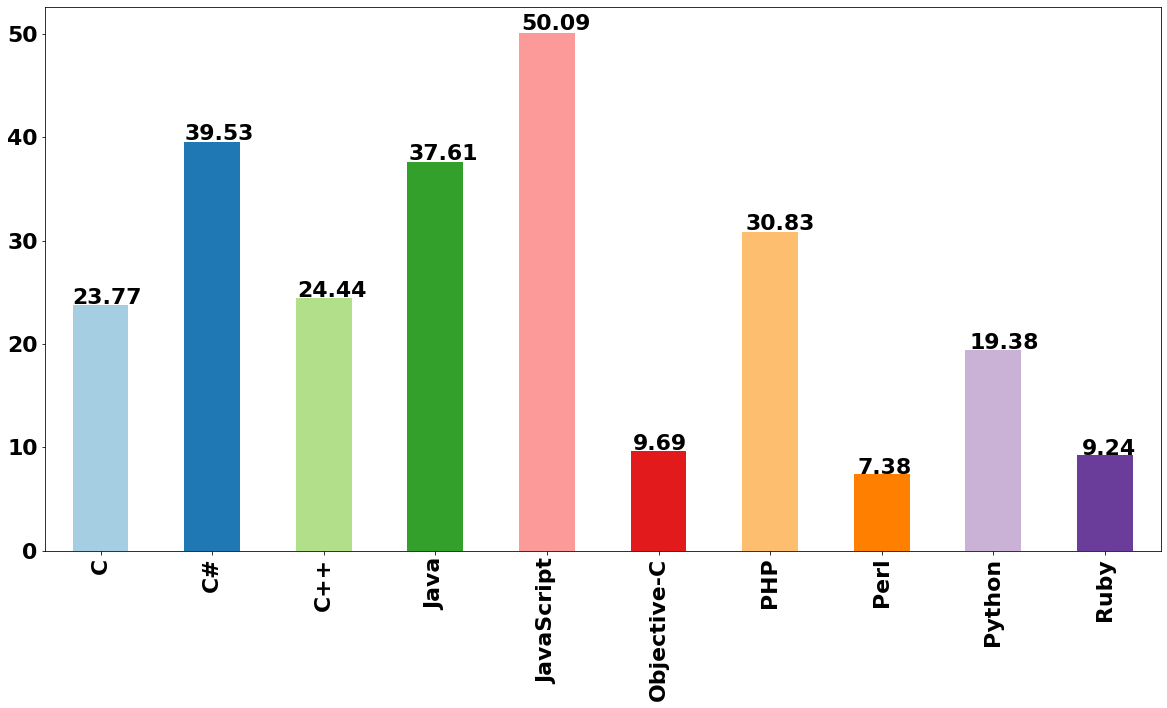

In [84]:
# sorting data to keep palette colors through plots
s_2012_proficiencies_percentages.sort_index(inplace=True)

# plotting data

ax_12 = s_2012_proficiencies_percentages.plot.bar(color=plt.cm.Paired(np.arange(len(s_2012_proficiencies_percentages))))
# annotating values on top of each bar, for readability
for p in ax_12.patches:
    ax_12.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

As we can see, year 2012, C++ overtook is "father" language C in 5th place. <br/>
Top 5 languages in 2012 are: <br>
1. JavaScript
2. C#
3. Java
4. PHP
5. C++ <br>

#### 2013 Results Analysis
Now I'll compute the answer to first question, referring to 2013 data:

In [40]:
proficiency_columns_range_2013 = range(56,69)
df_2013_proficiencies = df_surveys_13.iloc[:, proficiency_columns_range_2013]
s_2013_proficiencies = df_2013_proficiencies.sum(axis=0)
s_2013_proficiencies.sort_values(ascending=False).head(10)


Proficient in JavaScript     4735
Proficient in SQL            4593
Proficient in jQuery         4109
Proficient in C#             3027
Proficient in Java           3020
Proficient in PHP            2324
Proficient in Python         1880
Proficient in C++            1696
Proficient in C              1436
Proficient in Objective-C     955
dtype: int64

In [41]:
# computing percentages
s_2013_proficiencies_percentages = (s_2013_proficiencies/df_2013_proficiencies.shape[0])*100


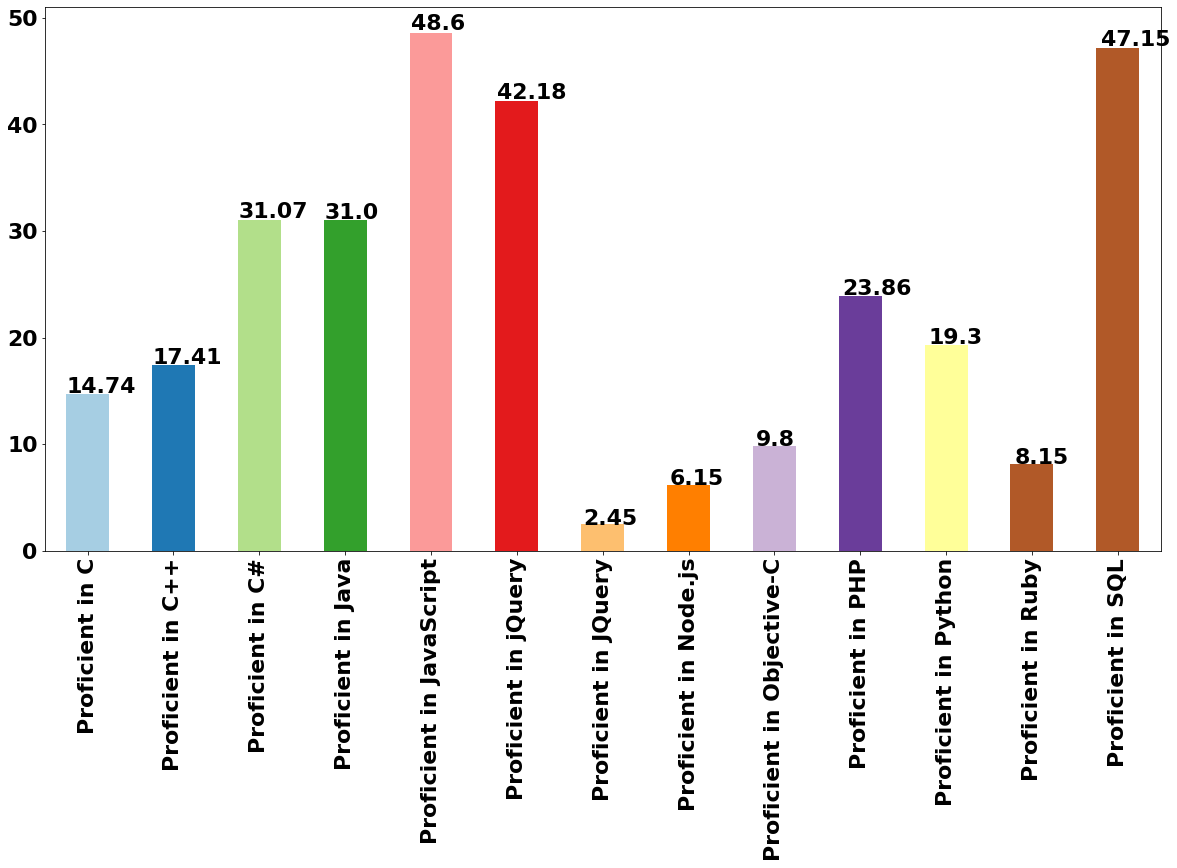

In [42]:
ax_13 = s_2013_proficiencies_percentages.plot.bar(color=plt.cm.Paired(np.arange(len(s_2013_proficiencies_percentages))))
# annotating values on top of each bar, for readability
for p in ax_13.patches:
    ax_13.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))

Top 5 languages in 2013: <br>
1. JavaScript
2. C#
3. Java
4. PHP
5. Python <br>
Once more in 2013, JavaScript was the most used language, followed by C# and Java <br> (they're almost tied,
jQuery, instead, is not a language but actually a JavaScript library, so it won't be counted)

#### 2014 Results Analysis
Now I'll compute the answer to first question, referring to 2014 data:


In [ ]:
proficiency_columns_range_2014 = range(42,53)
df_2014_proficiencies = df_surveys_14.iloc[:, proficiency_columns_range_2014]
s_2014_proficiencies = df_2014_proficiencies.sum(axis=0)
s_2014_proficiencies.sort_values(ascending=False).head(10)

Top 5 languages in 2014: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python

#### 2015 Results Analysis
Now I'll compute the answer to first question, referring to 2015 data:

In [ ]:
proficiency_columns_range_2015 = range(8,50)
df_2015_proficiencies = df_surveys_15.iloc[:, proficiency_columns_range_2015]
s_2015_proficiencies = df_2015_proficiencies.sum(axis=0)
s_2015_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2015: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python



#### 2016 Results Analysis
Now I'll compute the answer to first question, referring to 2016 data:


In [ ]:
# computing proficiencies for 2016 data
df_2016_proficiencies = df_surveys_16.filter(like='tech_do')
s_2016_proficiencies = df_2016_proficiencies.sum(axis=0)
s_2016_proficiencies.sort_values(ascending=False).head(10)

Top 5 languages in 2016: <br>
1. JavaScript
2. Java
3. C#
4. PHP
5. Python<br>

#### 2017 Results Analysis
Now I'll compute the answer to first question, referring to 2017 data:


In [ ]:
# computing proficiencies for 2017 data
df_2017_proficiencies = df_surveys_17.filter(like='HaveWorkedLanguage')
s_2017_proficiencies = df_2017_proficiencies.sum(axis=0)
s_2017_proficiencies.sort_values(ascending=False).head(10)

Top 5 languages in 2017: <br>
1. JavaScript
2. Java
3. C#
4. Python
5. PHP <br>

This year, python overtook PHP at the 4th place, and is growing in popularity.



#### 2018 Results Analysis
Now I'll compute the answer to first question, referring to 2018 data:


In [ ]:
# computing proficiencies for 2018 data
df_2018_proficiencies = df_surveys_18.filter(like='LanguageWorkedWith')
s_2018_proficiencies = df_2018_proficiencies.sum(axis=0)
s_2018_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2018: <br>
1. JavaScript
2. Java
3. Python
4. C#
5. PHP<br>

This year, python overtook C#, and is still growing in popularity.

#### 2019 Results Analysis
Now I'll compute the answer to first question, referring to 2019 data:

In [ ]:
# computing proficiencies for 2019 data
df_2019_proficiencies = df_surveys_19.filter(like='LanguageWorkedWith')
s_2019_proficiencies = df_2019_proficiencies.sum(axis=0)
s_2019_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2019: <br>
1. JavaScript
2. Python
3. Java
4. C#
5. PHP <br>

This year, Python overtook Java, and is still growing.

#### 2020 Results Analysis
Now I'll compute the answer to first question, referring to 2020 data:


In [ ]:
# computing proficiencies for 2020 data
df_2020_proficiencies = df_surveys_20.filter(like='LanguageWorkedWith')
s_2020_proficiencies = df_2020_proficiencies.sum(axis=0)
s_2020_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2020: <br>
Top 5 languages in 2021: <br>
1. JavaScript
2. Python
3. Java
4. C#
5. TypeScript <br>

In 2020, we had a quite stable top three languages.

#### 2021 Results Analysis
Now I'll compute the answer to first question, referring to 2021 data:


In [ ]:
# computing proficiencies for 2021 data
df_2021_proficiencies = df_surveys_21.filter(like='LanguageHaveWorkedWith')
s_2021_proficiencies = df_2021_proficiencies.sum(axis=0)
s_2021_proficiencies.sort_values(ascending=False).head(10)


Top 5 languages in 2021: <br>
1. JavaScript
2. Python
3. Java
4. TypeScript
5. C#<br>

This year, Python strengthen its 2nd position respect to Java and reduced the gap with JavaScript.

Now I'll proceed with trend analysis, in the following notebook.<br/>
To do so, once again, I'll need to store data from the current notebook.


In [ ]:
%store s_2011_proficiencies
%store s_2012_proficiencies
%store s_2013_proficiencies
%store s_2014_proficiencies
%store s_2015_proficiencies
%store s_2016_proficiencies
%store s_2017_proficiencies
%store s_2018_proficiencies
%store s_2019_proficiencies
%store s_2020_proficiencies
%store s_2021_proficiencies